In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import json
import requests
import folium
from folium.plugins import FastMarkerCluster, Fullscreen, MiniMap, HeatMap, HeatMapWithTime, LocateControl
from wordcloud import WordCloud
from collections import Counter
from PIL import Image


#pip install utilities-package
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [91]:
cd ..

/Users/Shandeep/Desktop/Data Science/Coding Assignments/bolt2


In [92]:
ls

coding/ data/


In [93]:
cd data

/Users/Shandeep/Desktop/Data Science/Coding Assignments/bolt2/data


In [94]:
ls

task1.xlsx  task2.xlsx


In [95]:
# Upload 2nd task excel file
file = 'task2.xlsx'
data = pd.ExcelFile(file)
print(data.sheet_names)

['Sheet1']


In [96]:
df = data.parse('Sheet1')


**Data Cleaning**

In [97]:
# Column Names: Lower case and Remove spaces

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','')

# Components of a data frame 

print(df.columns)

# Index of data frame

print()
print(df.index)

Index(['restaurantname', 'cuisine', 'monthlyorders', 'monthlygmv',
       'availability(%onlinetimeatthetablet)',
       'acceptancerate(%acceptedorders)', '%ofdeliveriesmorethan10minlate',
       'averageproviderwaitingforpickuptimeattherestaurant', 'commission,%',
       'averageordervalue(aov)', 'netrate(profitability%)',
       'estimatedsalesloss', 'boltrating(servicerating)',
       'photos(%ofmenuwithphotos)'],
      dtype='object')

RangeIndex(start=0, stop=19, step=1)


In [98]:
# Renaming Columns

new_columns_list = ['restaurant_name', 'cuisine', 'monthly_orders', 'monthly_gmv',
       'availability_perc_online_time_at_the_tablet',
       'acceptance_rate_perc_accepted_orders', 'perc_of_deliveries_more_than_ten_mins_late',
       'average_provider_waiting_for_pickup_time_at_the_restaurant', 'commission_perc',
       'average_order_value_aov', 'net_rate_profitability_perc',
       'estimated_sales_loss', 'bolt_rating_service_rating',
       'photos_perc_menu_with_photos']
df.columns = new_columns_list

In [99]:
df.head()

,restaurant_name,cuisine,monthly_orders,monthly_gmv,availability_perc_online_time_at_the_tablet,acceptance_rate_perc_accepted_orders,perc_of_deliveries_more_than_ten_mins_late,average_provider_waiting_for_pickup_time_at_the_restaurant,commission_perc,average_order_value_aov,net_rate_profitability_perc,estimated_sales_loss,bolt_rating_service_rating,photos_perc_menu_with_photos
0,Angus Bistro,Steak,117,883.70,0.6723,0.959,0.29,5.2,0.275,7.552991,-0.040,427,4.4,0.00
1,Big Kebab,Kebabs,160,1420.18,0.9761,0.892,0.12,12.3,0.250,8.876125,-0.160,34,4.3,1.00
2,Bone Daddy's,Asian,809,6892.75,0.9952,1.000,0.12,10.9,0.250,8.520087,-0.078,32,4.7,0.75
3,Chef Burger,Burgers,72,725.84,0.7752,1.000,0.08,10.9,0.210,10.081111,0.002,206,4.5,1.00
4,Di Lucca,Pizza,98,505.37,0.9156,0.947,0.09,8.0,0.250,5.156837,-0.110,47,4.6,0.00


In [100]:
df.restaurant_name.unique()

array(['Angus Bistro', 'Big Kebab', "Bone Daddy's", 'Chef Burger',
       'Di Lucca', 'Donut Factory', 'Home Burgers', 'Isao', 'La Braserie',
       'La Diva Pizzeria', 'La Lucha', 'Noe Sushi Bar', 'Oliveto',
       'Osaka', 'Sumo Sushi', 'Puerto Madero Steak House',
       'Sandwich Gourmet', 'Sandwich Qbano', 'Sweet & Coffee'],
      dtype=object)

**Understanding Data**

In [101]:
# Defining a function to understand the data better.

def eda(df, df_name):
    print(df_name.capitalize())
    print()
    print(f"Rows: {df.shape[0]} \t Columns: {df.shape[1]}")
    print()
          
    print(f"Number of Missing rows: {df.isnull().sum().sum()}")
    print()
          
    print(f"Number of Duplicate rows: {df[df.duplicated(keep=False)].shape[0]}")
    print()
          
    print(df.dtypes)
    print("_________________________________________\n")

In [102]:
data = [(df,"df")]

In [103]:
[eda(df,name) for df, name in data];

Df

Rows: 19 	 Columns: 14

Number of Missing rows: 0

Number of Duplicate rows: 0

restaurant_name                                                object
cuisine                                                        object
monthly_orders                                                  int64
monthly_gmv                                                   float64
availability_perc_online_time_at_the_tablet                   float64
acceptance_rate_perc_accepted_orders                          float64
perc_of_deliveries_more_than_ten_mins_late                    float64
average_provider_waiting_for_pickup_time_at_the_restaurant    float64
commission_perc                                               float64
average_order_value_aov                                       float64
net_rate_profitability_perc                                   float64
estimated_sales_loss                                            int64
bolt_rating_service_rating                                    float64
photos

**Column Types**

In [104]:
# Columns with numerical data
numerical_columns = df._get_numeric_data().columns

# Number of numerical columns
print('Number of columns with numerical data: ', len(numerical_columns))

# visualize data frame
df[numerical_columns].head(2)

Number of columns with numerical data:  12


,monthly_orders,monthly_gmv,availability_perc_online_time_at_the_tablet,acceptance_rate_perc_accepted_orders,perc_of_deliveries_more_than_ten_mins_late,average_provider_waiting_for_pickup_time_at_the_restaurant,commission_perc,average_order_value_aov,net_rate_profitability_perc,estimated_sales_loss,bolt_rating_service_rating,photos_perc_menu_with_photos
0,117,883.70,0.6723,0.959,0.29,5.2,0.275,7.552991,-0.04,427,4.4,0.0
1,160,1420.18,0.9761,0.892,0.12,12.3,0.250,8.876125,-0.16,34,4.3,1.0


In [105]:
categorical_columns = [columns for columns in df.columns if columns not in numerical_columns]

# Number of categorical columns
print('Number of columns with categorical data: ', len(categorical_columns))

# visualize data frame
df[categorical_columns].head(2)

Number of columns with categorical data:  2


,restaurant_name,cuisine
0,Angus Bistro,Steak
1,Big Kebab,Kebabs


In [106]:
for columns in categorical_columns:
    print('The column is {} and the number of categories it has is: {}'.format(columns, len(df[columns].unique())))

The column is restaurant_name and the number of categories it has is: 19
The column is cuisine and the number of categories it has is: 9


**Dealing with Null Values**

In [107]:
# Look for the number of missing data in each column
nulldf = pd.DataFrame(df.isnull().sum(), columns = ['Number_of_Null_Values'])
nulldf = nulldf[nulldf['Number_of_Null_Values'] != 0]

# Number of columns with nulll values
print('Number of columns with null values: ', len(nulldf))

nulldf.sort_values(by=['Number_of_Null_Values'], ascending = False)

Number of columns with null values:  0


,Number_of_Null_Values


In [108]:
df.head()

,restaurant_name,cuisine,monthly_orders,monthly_gmv,availability_perc_online_time_at_the_tablet,acceptance_rate_perc_accepted_orders,perc_of_deliveries_more_than_ten_mins_late,average_provider_waiting_for_pickup_time_at_the_restaurant,commission_perc,average_order_value_aov,net_rate_profitability_perc,estimated_sales_loss,bolt_rating_service_rating,photos_perc_menu_with_photos
0,Angus Bistro,Steak,117,883.70,0.6723,0.959,0.29,5.2,0.275,7.552991,-0.040,427,4.4,0.00
1,Big Kebab,Kebabs,160,1420.18,0.9761,0.892,0.12,12.3,0.250,8.876125,-0.160,34,4.3,1.00
2,Bone Daddy's,Asian,809,6892.75,0.9952,1.000,0.12,10.9,0.250,8.520087,-0.078,32,4.7,0.75
3,Chef Burger,Burgers,72,725.84,0.7752,1.000,0.08,10.9,0.210,10.081111,0.002,206,4.5,1.00
4,Di Lucca,Pizza,98,505.37,0.9156,0.947,0.09,8.0,0.250,5.156837,-0.110,47,4.6,0.00


In [139]:
# Adding an additional column into the analysis

df['gmv_per_order'] =df['monthly_gmv']/df['monthly_orders']
df['comms_revenue'] = df['monthly_gmv'] * df['commission_perc']
df['loss_over_gmv'] = df['estimated_sales_loss']/df['monthly_gmv']

**Looking at Data**

In [110]:
"""
    Script criado para consolidar funções úteis utilizadas na plotagem e personalização de gráficos
"""

"""
--------------------------------------------
---------- IMPORTANDO BIBLIOTECAS ----------
--------------------------------------------
"""
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from typing import *
from dataclasses import dataclass
from math import ceil

"""
--------------------------------------------
---------- 1. FORMATAÇÃO DE EIXOS ----------
--------------------------------------------
"""


# Formatando eixos do matplotlib
def format_spines(ax, right_border=True):
    """
    This function sets up borders from an axis and personalize colors

    Input:
        Axis and a flag for deciding or not to plot the right border
    Returns:
        Plot configuration
    """
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

# Classe para plotagem dos rótulos dos dados em gráficos de barras
# Referência: https://towardsdatascience.com/annotating-bar-charts-and-other-matplolib-techniques-cecb54315015
#Alias types to reduce typing, no pun intended
Patch = matplotlib.patches.Patch
PosVal = Tuple[float, Tuple[float, float]]
Axis = matplotlib.axes.Axes
PosValFunc = Callable[[Patch], PosVal]

@dataclass
class AnnotateBars:
    font_size: int = 10
    color: str = "black"
    n_dec: int = 2
    def horizontal(self, ax: Axis, centered=False):
        def get_vals(p: Patch) -> PosVal:
            value = p.get_width()
            div = 2 if centered else 1
            pos = (
                p.get_x() + p.get_width() / div,
                p.get_y() + p.get_height() / 2,
            )
            return value, pos
        ha = "center" if centered else  "left"
        self._annotate(ax, get_vals, ha=ha, va="center")
    def vertical(self, ax: Axis, centered:bool=False):
        def get_vals(p: Patch) -> PosVal:
            value = p.get_height()
            div = 2 if centered else 1
            pos = (p.get_x() + p.get_width() / 2,
                   p.get_y() + p.get_height() / div
            )
            return value, pos
        va = "center" if centered else "bottom"
        self._annotate(ax, get_vals, ha="center", va=va)
    def _annotate(self, ax, func: PosValFunc, **kwargs):
        cfg = {"color": self.color,
               "fontsize": self.font_size, **kwargs}
        for p in ax.patches:
            value, pos = func(p)
            ax.annotate(f"{value:.{self.n_dec}f}", pos, **cfg)

# Definindo funções úteis para plotagem dos rótulos no gráfico
def make_autopct(values):
    """
    Etapas:
        1. definição de função para formatação dos rótulos

    Argumentos:
        values -- valores extraídos da função value_counts() da coluna de análise [list]

    Retorno:
        my_autopct -- string formatada para plotagem dos rótulos
    """

    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))

        return '{p:.1f}%\n({v:d})'.format(p=pct, v=val)

    return my_autopct

"""
--------------------------------------------
---------- 2. PLOTAGENS GRÁFICAS -----------
--------------------------------------------
"""


# Função para plotagem de gráfico de rosca em relação a uma variávei específica do dataset
def donut_plot(df, col, ax, label_names=None, text='', colors=['crimson', 'navy'], circle_radius=0.8,
            title=f'Gráfico de Rosca', flag_ruido=0):
    """
    Etapas:
        1. definição de funções úteis para mostrar rótulos em valor absoluto e porcentagem
        2. criação de figura e círculo central de raio pré-definido
        3. plotagem do gráfico de pizza e adição do círculo central
        4. configuração final da plotagem

    Argumentos:
        df -- DataFrame alvo da análise [pandas.DataFrame]
        col -- coluna do DataFrame a ser analisada [string]
        label_names -- nomes customizados a serem plotados como labels [list]
        text -- texto central a ser posicionado [string / default: '']
        colors -- cores das entradas [list / default: ['crimson', 'navy']]
        figsize -- dimensões da plotagem [tupla / default: (8, 8)]
        circle_radius -- raio do círculo central [float / default: 0.8]

    Retorno:
        None
    """

    # Retorno dos valores e definição da figura
    values = df[col].value_counts().values
    if label_names is None:
        label_names = df[col].value_counts().index

    # Verificando parâmetro de supressão de alguma categoria da análise
    if flag_ruido > 0:
        values = values[:-flag_ruido]
        label_names = label_names[:-flag_ruido]

    # Plotando gráfico de rosca
    center_circle = plt.Circle((0, 0), circle_radius, color='white')
    ax.pie(values, labels=label_names, colors=colors, autopct=make_autopct(values))
    ax.add_artist(center_circle)

    # Configurando argumentos do texto central
    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    ax.set_title(title, size=14, color='dimgrey')


# Função para análise da matriz de correlação
def target_correlation_matrix(data, label_name, ax, n_vars=10, corr='positive', fmt='.2f', cmap='YlGnBu',
                              cbar=True, annot=True, square=True):
    """
    Etapas:
        1. construção de correlação entre as variáveis
        2. filtragem das top k variáveis com maior correlação
        3. plotagem e configuração da matriz de correlação

    Argumentos:
        data -- DataFrame a ser analisado [pandas.DataFrame]
        label_name -- nome da coluna contendo a variável resposta [string]
        n_vars -- indicador das top k variáveis a serem analisadas [int]
        corr -- indicador booleano para plotagem de correlações ('positive', 'negative') [string]
        fmt -- formato dos números de correlação na plotagem [string]
        cmap -- color mapping [string]
        figsize -- dimensões da plotagem gráfica [tupla]
        cbar -- indicador de plotagem da barra indicadora lateral [bool]
        annot -- indicador de anotação dos números de correlação na matriz [bool]
        square -- indicador para redimensionamento quadrático da matriz [bool]

    Retorno:
        None
    """

    # Criando matriz de correlação para a base de dados
    corr_mx = data.corr()

    # Retornando apenas as top k variáveis com maior correlação frente a variável resposta
    if corr == 'positive':
        corr_cols = list(corr_mx.nlargest(n_vars+1, label_name)[label_name].index)
        title = f'Top {n_vars} Features - Correlação Positiva com o Target'
    elif corr == 'negative':
        corr_cols = list(corr_mx.nsmallest(n_vars+1, label_name)[label_name].index)
        corr_cols = [label_name] + corr_cols[:-1]
        title = f'Top {n_vars} Features - Correlação Negativa com o Target'
        cmap = 'magma'

    corr_data = np.corrcoef(data[corr_cols].values.T)

    # Construindo plotagem da matriz
    sns.heatmap(corr_data, ax=ax, cbar=cbar, annot=annot, square=square, fmt=fmt, cmap=cmap,
                yticklabels=corr_cols, xticklabels=corr_cols)
    ax.set_title(title, size=14, color='dimgrey', pad=20)

    return


# Distplot para comparação de densidade das features baseadas na variável target
def distplot(df, features, fig_cols, hue=False, color=['crimson', 'darkslateblue'], hist=False, figsize=(16, 12)):
    """
    Etapas:
        1. criação de figura de acordo com as especificações dos argumentos
        2. laço para plotagem de boxplot por eixo
        3. formatação gráfica
        4. validação de eixos excedentes

    Argumentos:
        df -- base de dados para plotagem [pandas.DataFrame]
        features -- conjunto de colunas a serem avaliadas [list]
        fig_cols -- especificações da figura do matplotlib [int]
        hue -- variável resposta contida na base [string -- default: False]
        color_list -- cores para cada classe nos gráficos [list - default: ['crimson', 'darkslateblue']]
        hist -- indicador de plotagem das faixas do histograma [bool - default: False]
        figsize -- dimensões da plotagem [tupla - default: (16, 12)]

    Retorno:
        None
    """

    # Definindo variáveis de controle
    n_features = len(features)
    fig_cols = fig_cols
    fig_rows = ceil(n_features / fig_cols)
    i, j, color_idx = (0, 0, 0)

    # Plotando gráficos
    fig, axs = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=figsize)

    # Percorrendo por cada uma das features
    for col in features:
        try:
            ax = axs[i, j]
        except:
            ax = axs[j]
        target_idx = 0

        # Plotando, para cada eixo, um gráfico por classe target
        if hue != False:
            for classe in df[hue].value_counts().index:
                df_hue = df[df[hue] == classe]
                sns.distplot(df_hue[col], color=color[target_idx], hist=hist, ax=ax, label=classe)
                target_idx += 1
        else:
            sns.distplot(df[col], color=color, hist=hist, ax=ax)

        # Incrementando índices
        j += 1
        if j == fig_cols:
            j = 0
            i += 1

        # Customizando plotagem
        ax.set_title(f'Feature: {col}', color='dimgrey', size=14)
        plt.setp(ax, yticks=[])
        sns.set(style='white')
        sns.despine(left=True)

    # Tratando caso apartado: figura(s) vazia(s)
    i, j = (0, 0)
    for n_plots in range(fig_rows * fig_cols):

        # Se o índice do eixo for maior que a quantidade de features, elimina as bordas
        if n_plots >= n_features:
            try:
                axs[i][j].axis('off')
            except TypeError as e:
                axs[j].axis('off')

        # Incrementando
        j += 1
        if j == fig_cols:
            j = 0
            i += 1

    # Finalizando customização
    plt.tight_layout()
    plt.show()


# Função para plotagem de stripplot
def stripplot(df, features, fig_cols, hue=False, palette='viridis', figsize=(16, 12)):
    """
    Etapas:
        1. criação de figura de acordo com as especificações dos argumentos
        2. laço para plotagem de stripplot por eixo
        3. formatação gráfica
        4. validação de eixos excedentes

    Argumentos:
        df -- base de dados para plotagem [pandas.DataFrame]
        features -- conjunto de colunas a serem avaliadas [list]
        fig_cols -- especificações da figura do matplotlib [int]
        hue -- variável resposta contida na base [string - default: False]
        palette -- paleta de cores [string / lista - default: 'viridis']
        figsize -- dimensões da figura de plotagem [tupla - default: (16, 12)]

    Retorno:
        None
    """

    # Definindo variáveis de controle
    n_features = len(features)
    fig_cols = fig_cols
    fig_rows = ceil(n_features / fig_cols)
    i, j, color_idx = (0, 0, 0)

    # Plotando gráficos
    fig, axs = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=figsize)

    # Plotando gráfico
    for col in features:
        try:
            ax = axs[i, j]
        except:
            ax = axs[j]

        # Plotando gráfico atribuindo a variável target como hue
        if hue != False:
            sns.stripplot(x=df[hue], y=df[col], ax=ax, palette=palette)
        else:
            sns.stripplot(y=df[col], ax=ax, palette=palette)

        # Formatando gráfico
        format_spines(ax, right_border=False)
        ax.set_title(f'Feature: {col.upper()}', size=14, color='dimgrey')
        plt.tight_layout()

        # Incrementando índices
        j += 1
        if j == fig_cols:
            j = 0
            i += 1

    # Tratando caso apartado: figura(s) vazia(s)
    i, j = (0, 0)
    for n_plots in range(fig_rows * fig_cols):

        # Se o índice do eixo for maior que a quantidade de features, elimina as bordas
        if n_plots >= n_features:
            try:
                axs[i][j].axis('off')
            except TypeError as e:
                axs[j].axis('off')

        # Incrementando
        j += 1
        if j == fig_cols:
            j = 0
            i += 1


def boxenplot(df, features, fig_cols, hue=False, palette='viridis', figsize=(16, 12)):
    """
    Etapas:
        1. criação de figura de acordo com as especificações dos argumentos
        2. laço para plotagem de boxplot por eixo
        3. formatação gráfica
        4. validação de eixos excedentes

    Argumentos:
        df -- base de dados para plotagem [pandas.DataFrame]
        features -- conjunto de colunas a serem avaliadas [list]
        fig_cols -- especificações da figura do matplotlib [int]
        hue -- variável resposta contida na base [string - default: False]
        palette -- paleta de cores [string / lista - default: 'viridis']
        figsize -- dimensões da figura de plotagem [tupla - default: (16, 12)]

    Retorno:
        None
    """

    # Definindo variáveis de controle
    n_features = len(features)
    fig_rows = ceil(n_features / fig_cols)
    i, j, color_idx = (0, 0, 0)

    # Plotando gráficos
    fig, axs = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=figsize)

    # Plotando gráfico
    for col in features:
        try:
            ax = axs[i, j]
        except:
            ax = axs[j]

        # Plotando gráfico atribuindo a variável target como hue
        if hue != False:
            sns.boxenplot(x=df[hue], y=df[col], ax=ax, palette=palette)
        else:
            sns.boxenplot(y=df[col], ax=ax, palette=palette)

        # Formatando gráfico
        format_spines(ax, right_border=False)
        ax.set_title(f'Feature: {col.upper()}', size=14, color='dimgrey')
        plt.tight_layout()

        # Incrementando índices
        j += 1
        if j == fig_cols:
            j = 0
            i += 1

    # Tratando caso apartado: figura(s) vazia(s)
    i, j = (0, 0)
    for n_plots in range(fig_rows * fig_cols):

        # Se o índice do eixo for maior que a quantidade de features, elimina as bordas
        if n_plots >= n_features:
            try:
                axs[i][j].axis('off')
            except TypeError as e:
                axs[j].axis('off')

        # Incrementando
        j += 1
        if j == fig_cols:
            j = 0
            i += 1


# Função responsável por plotar volumetria de uma variável categórica (quebra por hue é opcional)
def countplot(df, feature, order=True, hue=False, label_names=None, palette='plasma', colors=['darkgray', 'navy'],
              figsize=(12, 5), loc_legend='lower left', width=0.75, sub_width=0.3, sub_size=12):
    """
    Etapas:
        1. customização da plotagem de acordo com a presença (ou não) do parâmetro hue
        2. definição das figuras e plotagem dos gráficos adequados
        3. customização da plotagem

    Argumentos:
        df -- DataFrame alvo da análise [pandas.DataFrame]
        feature -- coluna a ser analisada [string]
        order -- flag booleano pra indicar a ordenação da plotagem [bool - default: True]
        hue -- parâmetro de quebra de análise [string - default: False]
        label_names -- descrição dos labels a serem colocados na legenda [list - default: None]
        palette -- paleta de cores a ser utilizada no plot singular da variável [string - default: 'viridis']
        colors -- cores a serem utilizadas no plot quebrado por hue [list - default: ['darkgray', 'navy']]
        figsize -- dimensões da plotagem [tupla - default: (15, 5)]
        loc_legend -- posição da legenda em caso de plotagem por hue [string - default: 'best']
        width -- largura das barras em caso de plotagem por hue [float - default: 0.5]
        sub_width -- parâmetro de alinhamento dos rótulos em caso de plotagem por hue [float - default: 0.3]

    Retorno:
        None
    """

    # Verificando plotagem por quebra de alguma variável categórica
    ncount = len(df)
    if hue != False:
        # Redifinindo dimensões e plotando gráfico solo + versus variável categórica
        figsize = (figsize[0], figsize[1] * 2)
        fig, axs = plt.subplots(nrows=2, ncols=1, figsize=figsize)
        if order:
            sns.countplot(x=feature, data=df, palette=palette, ax=axs[0], order=df[feature].value_counts().index)
        else:
            sns.countplot(x=feature, data=df, palette=palette, ax=axs[0])

        # Plotando gráfico de análise por hue (stacked bar chart)
        feature_rate = pd.crosstab(df[feature], df[hue])
        percent_df = feature_rate.div(feature_rate.sum(1).astype(float), axis=0)
        if order:
            sort_cols = list(df[feature].value_counts().index)
            sorter_index = dict(zip(sort_cols, range(len(sort_cols))))
            percent_df['rank'] = percent_df.index.map(sorter_index)
            percent_df = percent_df.sort_values(by='rank')
            percent_df = percent_df.drop('rank', axis=1)
            percent_df.plot(kind='bar', stacked=True, ax=axs[1], color=colors, width=width)
        else:
            percent_df.plot(kind='bar', stacked=True, ax=axs[1], color=colors, width=width)
        # sns.countplot(x=feature, data=df, palette=colors, hue=hue, ax=axs[1], order=df[feature].value_counts().index)

        # Inserindo rótulo de percentual para gráfico singular
        for p in axs[0].patches:
            # Coletando parâmetros e inserindo no gráfico
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            axs[0].annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y), ha='center', va='bottom',
                            size=sub_size)

        # Inserindo rótulo de percentual para gráfico hue
        for p in axs[1].patches:
            # Coletando parâmetros
            height = p.get_height()
            width = p.get_width()
            x = p.get_x()
            y = p.get_y()

            # Formatando parâmetros coletados e inserindo no gráfico
            label_text = f'{round(100 * height, 1)}%'
            label_x = x + width - sub_width
            label_y = y + height / 2
            axs[1].text(label_x, label_y, label_text, ha='center', va='center', color='white', fontweight='bold',
                        size=sub_size)

        # Definindo títulos
        axs[0].set_title(f'Análise de Volumetria da Variável {feature}', size=14, color='dimgrey', pad=20)
        axs[0].set_ylabel('Volumetria')
        axs[1].set_title(f'Análise de Volumetria da Variável {feature} por {hue}', size=14, color='dimgrey', pad=20)
        axs[1].set_ylabel('Percentual')

        # Formatando eixo de cada uma das plotagens
        for ax in axs:
            format_spines(ax, right_border=False)

        # Definindo legenda para hue
        plt.legend(loc=loc_legend, title=f'{hue}', labels=label_names)

    else:
        # Plotagem única: sem quebra por variável hue
        fig, ax = plt.subplots(figsize=figsize)
        if order:
            sns.countplot(x=feature, data=df, palette=palette, ax=ax, order=df[feature].value_counts().index)
        else:
            sns.countplot(x=feature, data=df, palette=palette, ax=ax)

            # Formatando eixos
        ax.set_ylabel('Volumetria')
        format_spines(ax, right_border=False)

        # Inserindo rótulo de percentual
        for p in ax.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax.annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y), ha='center', va='bottom')

        # Definindo título
        ax.set_title(f'Análise de Volumetria da Variável {feature}', size=14, color='dimgrey')

    # Configurações finais
    plt.tight_layout()
    plt.show()

# Função responsável por plotar volumetria de uma única variável categórica em formato atualizado
def single_countplot(df, ax, x=None, y=None, top=None, order=True, hue=False, palette='plasma',
                     width=0.75, sub_width=0.3, sub_size=12):
    """
    Parâmetros
    ----------
    classifiers: conjunto de classificadores em forma de dicionário [dict]
    X: array com os dados a serem utilizados no treinamento [np.array]
    y: array com o vetor target do modelo [np.array]

    Retorno
    -------
    None
    """

    # Verificando plotagem por quebra de alguma variável categórica
    ncount = len(df)
    if x:
        col = x
    else:
        col = y

    # Verificando a plotagem de top categorias
    if top is not None:
        cat_count = df[col].value_counts()
        top_categories = cat_count[:top].index
        df = df[df[col].isin(top_categories)]

    # Validando demais argumentos e plotando gráfico
    if hue != False:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index, hue=hue)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, hue=hue)
    else:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax)

    # Formatando eixos
    format_spines(ax, right_border=False)

    # Inserindo rótulo de percentual
    if x:
        for p in ax.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax.annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), ha='center', va='bottom')
    else:
        for p in ax.patches:
            x = p.get_bbox().get_points()[1, 0]
            y = p.get_bbox().get_points()[:, 1]
            ax.annotate('{} ({:.1f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), va='center')


# Função para plotagem de volumetria das variáveis categóricas do conjunto de dados
def catplot_analysis(df_categorical, fig_cols=3, hue=False, palette='viridis', figsize=(16, 10)):
    """
    Etapas:
        1. retorno das variáveis categóricas do conjunto de dados
        2. parametrização de variáveis de plotagem
        3. aplicação de laços de repetição para plotagens / formatação

    Argumentos:
        df -- conjunto de dados a ser analisado [pandas.DataFrame]
        fig_cols -- quantidade de colunas da figura matplotlib [int]

    Retorno:
        None
    """

    # Retornando parâmetros para organização da figura
    if hue != False:
        cat_features = list(df_categorical.drop(hue, axis=1).columns)
    else:
        cat_features = list(df_categorical.columns)

    total_cols = len(cat_features)
    fig_cols = fig_cols
    fig_rows = ceil(total_cols / fig_cols)
    ncount = len(cat_features)

    # Retornando parâmetros para organização da figura
    sns.set(style='white', palette='muted', color_codes=True)
    total_cols = len(cat_features)
    fig_rows = ceil(total_cols / fig_cols)

    # Criando figura de plotagem
    fig, axs = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(figsize))
    i, j = 0, 0

    # Laço de repetição para plotagem categórica
    for col in cat_features:
        # Indexando variáveis e plotando gráfico
        try:
            ax = axs[i, j]
        except:
            ax = axs[j]
        if hue != False:
            sns.countplot(y=col, data=df_categorical, palette=palette, ax=ax, hue=hue,
                          order=df_categorical[col].value_counts().index)
        else:
            sns.countplot(y=col, data=df_categorical, palette=palette, ax=ax,
                          order=df_categorical[col].value_counts().index)

        # Customizando gráfico
        format_spines(ax, right_border=False)
        AnnotateBars(n_dec=0, color='dimgrey').horizontal(ax)
        ax.set_title(col)

        # Incrementando índices de eixo
        j += 1
        if j == fig_cols:
            j = 0
            i += 1

    # Tratando caso apartado: figura(s) vazia(s)
    i, j = (0, 0)
    for n_plots in range(fig_rows * fig_cols):

        # Se o índice do eixo for maior que a quantidade de features, elimina as bordas
        if n_plots >= len(cat_features):
            try:
                axs[i][j].axis('off')
            except TypeError as e:
                axs[j].axis('off')

        # Incrementando
        j += 1
        if j == fig_cols:
            j = 0
            i += 1

    plt.tight_layout()
    plt.show()


# Função para plotagem de volumetria das variáveis categóricas do conjunto de dados
def numplot_analysis(df_numerical, fig_cols=3, color_sequence=['darkslateblue', 'mediumseagreen', 'darkslateblue'],
                     hue=False, color_hue=['darkslateblue', 'crimson'], hist=False):
    """
    Etapas:
        1. retorno das variáveis categóricas do conjunto de dados
        2. parametrização de variáveis de plotagem
        3. aplicação de laços de repetição para plotagens / formatação

    Argumentos:
        df -- conjunto de dados a ser analisado [pandas.DataFrame]
        fig_cols -- quantidade de colunas da figura matplotlib [int]

    Retorno:
        None
    """

    # Configurando sets do seaborn
    sns.set(style='white', palette='muted', color_codes=True)

    # Criando um DataFrame de variáveis categóricas
    #num_features = [col for col, dtype in df.dtypes.items() if dtype != 'object']
    #df_numerical = df.loc[:, num_features]

    # Retornando parâmetros para organização da figura
    if hue != False:
        num_features = list(df_numerical.drop(hue, axis=1).columns)
    else:
        num_features = list(df_numerical.columns)

    total_cols = len(num_features)
    fig_cols = fig_cols
    fig_rows = ceil(total_cols / fig_cols)

    # Criando figura de plotagem
    fig, axs = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(fig_cols * 5, fig_rows * 4.5))
    sns.despine(left=True)
    i, j = 0, 0

    # Laço de repetição para plotagem categórica
    color_idx = 0
    for col in num_features:
        # Indexando variáveis e plotando gráfico
        try:
            ax = axs[i, j]
        except:
            ax = axs[j]
        target_idx = 0

        if hue != False:
            for classe in df_numerical[hue].value_counts().index:
                df_hue = df_numerical[df_numerical[hue] == classe]
                sns.distplot(df_hue[col], color=color_hue[target_idx], hist=hist, ax=ax, label=classe)
                target_idx += 1
                ax.set_title(col)
        else:
            sns.distplot(df_numerical[col], color=color_sequence[color_idx], hist=hist, ax=ax)
            ax.set_title(col, color=color_sequence[color_idx])

        # Customizando gráfico
        format_spines(ax, right_border=False)

        # Incrementando índices de eixo
        color_idx += 1
        j += 1
        if j == fig_cols:
            j = 0
            i += 1
            color_idx = 0

    # Tratando caso apartado: figura(s) vazia(s)
    i, j = (0, 0)
    for n_plots in range(fig_rows * fig_cols):

        # Se o índice do eixo for maior que a quantidade de features, elimina as bordas
        if n_plots >= len(num_features):
            try:
                axs[i][j].axis('off')
            except TypeError as e:
                axs[j].axis('off')

        # Incrementando
        j += 1
        if j == fig_cols:
            j = 0
            i += 1

    plt.setp(axs, yticks=[])
    plt.tight_layout()
    plt.show()


# Função para plotagem de representatividade de cada categoria quanto a um hue específico
def catplot_percentage_analysis(df_categorical, hue, fig_cols=2, palette='viridis', figsize=(16, 10)):
    """
    Etapas:
        1. retorno das variáveis categóricas do conjunto de dados
        2. parametrização de variáveis de plotagem
        3. aplicação de laços de repetição para plotagens / formatação

    Argumentos:
        df -- conjunto de dados a ser analisado [pandas.DataFrame]
        fig_cols -- quantidade de colunas da figura matplotlib [int]

    Retorno:
        None
    """
 
    # Retornando parâmetros para organização da figura
    sns.set(style='white', palette='muted', color_codes=True)
    cat_features = list(df_categorical.drop(hue, axis=1).columns)
    total_cols = len(cat_features)
    fig_rows = ceil(total_cols / fig_cols)

    # Criando figura de plotagem
    fig, axs = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(figsize))
    i, j = 0, 0

    # Laço de repetição para plotagem categórica
    for col in cat_features:
        # Indexando variáveis e plotando gráfico
        try:
            ax = axs[i, j]
        except:
            ax = axs[j]

        # Aplicando crosstab para análise de representatividade da categoria
        col_to_hue = pd.crosstab(df_categorical[col], df_categorical[hue])
        col_to_hue.div(col_to_hue.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, ax=ax,
                                                                     colors=palette)

        # Customizando gráfico
        format_spines(ax, right_border=False)
        ax.set_title(col)
        ax.set_ylabel('')

        # Incrementando índices de eixo
        j += 1
        if j == fig_cols:
            j = 0
            i += 1

    # Tratando caso apartado: figura(s) vazia(s)
    i, j = (0, 0)
    for n_plots in range(fig_rows * fig_cols):

        # Se o índice do eixo for maior que a quantidade de features, elimina as bordas
        if n_plots >= len(cat_features):
            try:
                axs[i][j].axis('off')
            except TypeError as e:
                axs[j].axis('off')

        # Incrementando
        j += 1
        if j == fig_cols:
            j = 0
            i += 1

    plt.tight_layout()
    plt.show()


def mean_sum_analysis(df, group_col, value_col, orient='vertical', palette='plasma', figsize=(15, 6)):
    """
    Parâmetros
    ----------
    classifiers: conjunto de classificadores em forma de dicionário [dict]
    X: array com os dados a serem utilizados no treinamento [np.array]
    y: array com o vetor target do modelo [np.array]

    Retorno
    -------
    None
    """

    # Grouping data
    df_mean = df.groupby(group_col, as_index=False).mean()
    df_sum = df.groupby(group_col, as_index=False).sum()

    # Sorting grouped dataframes
    df_mean.sort_values(by=value_col, ascending=False, inplace=True)
    sorter = list(df_mean[group_col].values)
    sorter_idx = dict(zip(sorter, range(len(sorter))))
    df_sum['mean_rank'] = df_mean[group_col].map(sorter_idx)
    df_sum.sort_values(by='mean_rank', inplace=True)
    df_sum.drop('mean_rank', axis=1, inplace=True)

    # Plotting data
    fig, axs = plt.subplots(ncols=2, figsize=figsize)
    if orient == 'vertical':
        sns.barplot(x=value_col, y=group_col, data=df_mean, ax=axs[0], palette=palette)
        sns.barplot(x=value_col, y=group_col, data=df_sum, ax=axs[1], palette=palette)
        AnnotateBars(n_dec=0, font_size=12, color='black').horizontal(axs[0])
        AnnotateBars(n_dec=0, font_size=12, color='black').horizontal(axs[1])
    elif orient == 'horizontal':
        sns.barplot(x=group_col, y=value_col, data=df_mean, ax=axs[0], palette=palette)
        sns.barplot(x=group_col, y=value_col, data=df_sum, ax=axs[1], palette=palette)
        AnnotateBars(n_dec=0, font_size=12, color='black').vertical(axs[0])
        AnnotateBars(n_dec=0, font_size=12, color='black').vertical(axs[1])

    # Customizing plot
    for ax in axs:
        format_spines(ax, right_border=False)
        ax.set_ylabel('')
    axs[0].set_title(f'Mean of {value_col} by {group_col}', size=14, color='dimgrey')
    axs[1].set_title(f'Sum of {value_col} by {group_col}', size=14, color='dimgrey')

    plt.tight_layout()
    plt.show()


def answear_plot(grouped_data, grouped_col, list_cols, axs, top=5, bottom_filter=True, palette='plasma'):
    """
    Parâmetros
    ----------
    grouped_data: pandas DataFrame com os dados já agrupados para análise [pd.DataFrame]
    grouped_col: referência da coluna pivot utilizada no agrupamento [string]
    list_cols: lista de colunas a serem utilizadas na análise [list]
    axs: eixos a serem utilizados na plotagem [matplotlib.axis]
    top: quantidade de entradas nas análises head and tail [int, default: 5]
    bottom_filter: flag para filtragem de elementos com pelo menos 1 ocorrência no bot [bool, default: True]
    palette: paleta de cores utilizada na plotagem [string, default: 'plasma']

    Retorno
    -------
    None
    """

    # Extracting plot dims and looking at number of cols
    nrows = axs.shape[0]
    ncols = axs.shape[1]
    if len(list_cols) != ncols:
        print(f'Number of cols passed in list_cols arg is different for figure cols axis. Please check it.')
        return None

    # Iterating over columns in the list and creating charts
    i, j = 0, 0
    for col in list_cols:
        ax0 = axs[-3, j]
        ax1 = axs[-2, j]
        ax2 = axs[-1, j]
        sorted_data = grouped_data.sort_values(by=col, ascending=False)

        # First Line: Top entries
        sns.barplot(x=col, y=grouped_col, data=sorted_data.head(top), ax=ax1, palette=palette)
        ax1.set_title(f'Top {top} {grouped_col.capitalize()} with Highest \n{col.capitalize()}')

        # Second Line: Bottom entries
        if bottom_filter:
            sns.barplot(x=col, y=grouped_col, data=sorted_data[sorted_data[col] > 0].tail(top), ax=ax2,
                        palette=palette+'_r')
        else:
            sns.barplot(x=col, y=grouped_col, data=sorted_data.tail(top), ax=ax2, palette=palette+'_r')
        ax2.set_title(f'Top {top} {grouped_col.capitalize()} with Lowest \n{col.capitalize()}')

        # Customizing charts
        for ax in ax1, ax2:
            ax.set_xlim(0, grouped_data[col].max())
            ax.set_ylabel('')
            format_spines(ax, right_border=False)

        # Annotations
        mean_ind = grouped_data[col].mean()
        ax0.text(0.50, 0.30, round(mean_ind, 2), fontsize=45, ha='center')
        ax0.text(0.50, 0.12, f'is the average of {col}', fontsize=12, ha='center')
        ax0.text(0.50, 0.00, f'by {grouped_col}', fontsize=12, ha='center')
        ax0.axis('off')

        j += 1

"""
--------------------------------------------
-------- 3. ANÁLISES EM DATAFRAMES ---------
--------------------------------------------
"""


def data_overview(df, corr=False, label_name=None, sort_by='qtd_null', thresh_percent_null=0, thresh_corr_label=0):
    """
    Etapas:
        1. levantamento de atributos com dados nulos no conjunto
        2. análise do tipo primitivo de cada atributo
        3. análise da quantidade de entradas em caso de atributos categóricos
        4. extração da correlação pearson com o target para cada atributo
        5. aplicação de regras definidas nos argumentos
        6. retorno do dataset de overview criado

    Argumentos:
        df -- DataFrame a ser analisado [pandas.DataFrame]
        label_name -- nome da variável target [string]
        sort_by -- coluna de ordenação do dataset de overview [string - default: 'qtd_null']
        thresh_percent_null -- filtro de dados nulos [int - default: 0]
        threh_corr_label -- filtro de correlação com o target [int - default: 0]

    Retorno
        df_overview -- dataet consolidado contendo análise das colunas [pandas.DataFrame]
    """

    # Criando DataFrame com informações de dados nulos
    df_null = pd.DataFrame(df.isnull().sum()).reset_index()
    df_null.columns = ['feature', 'qtd_null']
    df_null['percent_null'] = df_null['qtd_null'] / len(df)

    # Retornando tipo primitivo e qtd de entradas para os categóricos
    df_null['dtype'] = df_null['feature'].apply(lambda x: df[x].dtype)
    df_null['qtd_cat'] = [len(df[col].value_counts()) if df[col].dtype == 'object' else 0 for col in
                          df_null['feature'].values]

    if corr:
        # Extraindo informação de correlação com o target
        label_corr = pd.DataFrame(df.corr()[label_name])
        label_corr = label_corr.reset_index()
        label_corr.columns = ['feature', 'target_pearson_corr']

        # Unindo informações
        df_null_overview = df_null.merge(label_corr, how='left', on='feature')
        df_null_overview.query('target_pearson_corr > @thresh_corr_label')
    else:
        df_null_overview = df_null

    # Filtrando dados nulos de acordo com limiares
    df_null_overview.query('percent_null > @thresh_percent_null')

    # Ordenando DataFrame
    df_null_overview = df_null_overview.sort_values(by=sort_by, ascending=False)
    df_null_overview = df_null_overview.reset_index(drop=True)

    return df_null_overview

In [111]:
df.columns

Index(['restaurant_name', 'cuisine', 'monthly_orders', 'monthly_gmv',
       'availability_perc_online_time_at_the_tablet',
       'acceptance_rate_perc_accepted_orders',
       'perc_of_deliveries_more_than_ten_mins_late',
       'average_provider_waiting_for_pickup_time_at_the_restaurant',
       'commission_perc', 'average_order_value_aov',
       'net_rate_profitability_perc', 'estimated_sales_loss',
       'bolt_rating_service_rating', 'photos_perc_menu_with_photos',
       'gmv_per_order', 'comms_revenue'],
      dtype='object')

In [112]:
len(df.cuisine.value_counts())

9

In [113]:
unpopular_cuisines = df[df.cuisine.isin(['Coffee','Kebabs','Deserts'])].reset_index(drop=True)
unpopular_cuisines.head()

,restaurant_name,cuisine,monthly_orders,monthly_gmv,availability_perc_online_time_at_the_tablet,acceptance_rate_perc_accepted_orders,perc_of_deliveries_more_than_ten_mins_late,average_provider_waiting_for_pickup_time_at_the_restaurant,commission_perc,average_order_value_aov,net_rate_profitability_perc,estimated_sales_loss,bolt_rating_service_rating,photos_perc_menu_with_photos,gmv_per_order,comms_revenue
0,Big Kebab,Kebabs,160,1420.18,0.9761,0.892,0.12,12.3,0.25,8.876125,-0.160,34,4.3,1.0,8.876125,355.0450
1,Donut Factory,Deserts,75,1377.78,0.9646,1.000,0.10,8.6,0.20,18.370400,-0.006,52,4.8,1.0,18.370400,275.5560
2,Sweet & Coffee,Coffee,483,3612.89,0.8761,0.988,0.15,5.6,0.25,7.480104,-0.061,510,4.6,0.3,7.480104,903.2225


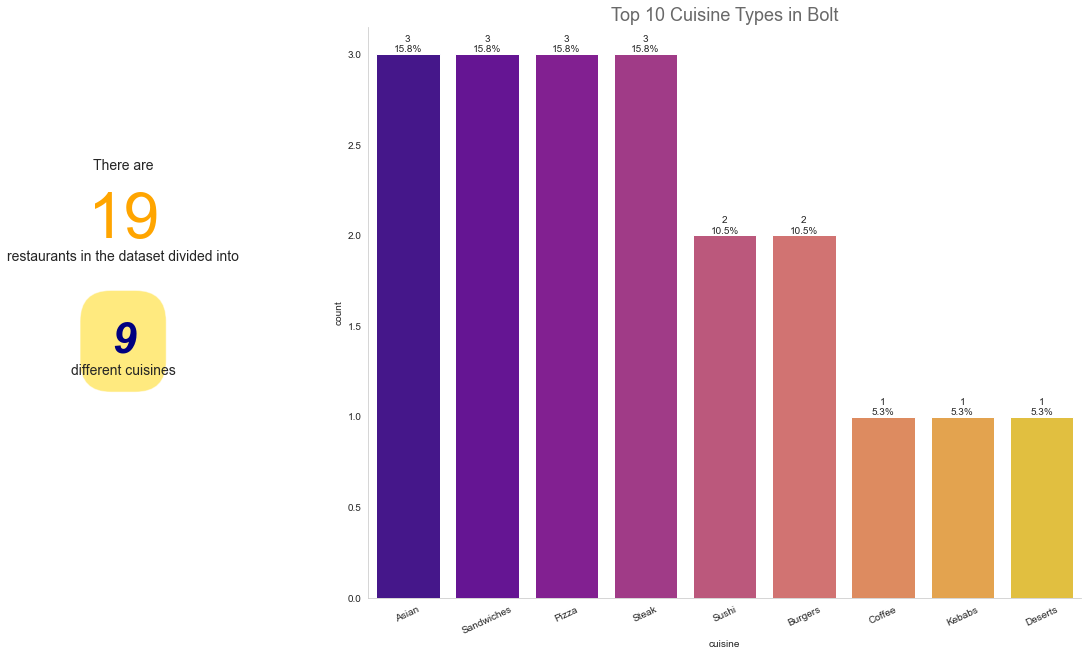

In [114]:
# Building a figure
fig = plt.figure(constrained_layout=True, figsize=(15, 9))

# Axis definition with GridSpec
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:3])

# Axis 1 - Big Number for total restaurants and total types in the data
total_restaurants = len(df['restaurant_name'].value_counts())
total_types = len(df['cuisine'].value_counts())
ax1.text(0.00, 0.75, 'There are', fontsize=14, ha='center')
ax1.text(0.00, 0.63, f'{total_restaurants}', fontsize=64, color='orange', ha='center')
ax1.text(0, 0.59, 'restaurants in the dataset divided into', fontsize=14, ha='center')
ax1.text(0.00, 0.43, total_types, fontsize=44, ha='center', color='navy', style='italic', weight='bold',
         bbox=dict(facecolor='gold', alpha=0.5, pad=14, boxstyle='round, pad=.7'))
ax1.text(0, 0.39, 'different cuisines', fontsize=14, ha='center')
ax1.axis('off')

# Axis 2 - Total number of restaurants per type (Top N)
top = 10
single_countplot(df, ax2, x='cuisine', top=top)
ax2.set_title(f'Top {top} Cuisine Types in Bolt', color='dimgrey', size=18)
for tick in ax2.get_xticklabels():
    tick.set_rotation(25)

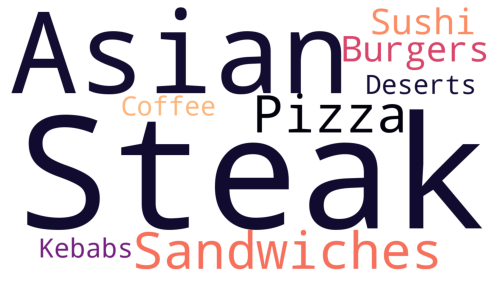

In [115]:
from collections import Counter
from wordcloud import WordCloud
# Creating a list with all options available
cuisines = list(df['cuisine'].astype(str).values)
cuisines_word_list = []
for lista in [c.split(',') for c in cuisines]:
    for word in lista:
        cuisines_word_list.append(word.strip())
        
# Creating a Counter for unique options and generating the wordcloud
cuisines_wc_dict = Counter(cuisines_word_list)

wordcloud = WordCloud(width=1280, height=720, collocations=False, random_state=42, 
                      colormap='magma', background_color='white').generate_from_frequencies(cuisines_wc_dict)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_orders,19.0,224.052632,208.523506,62.000000,110.000000,144.000000,207.000000,809.0000
monthly_gmv,19.0,2009.685263,1677.619807,505.370000,995.335000,1420.180000,2255.750000,6892.7500
availability_perc_online_time_at_the_tablet,19.0,0.902168,0.107133,0.672300,0.825650,0.964600,0.979000,0.9999
acceptance_rate_perc_accepted_orders,19.0,0.980421,0.030086,0.892000,0.968500,1.000000,1.000000,1.0000
perc_of_deliveries_more_than_ten_mins_late,19.0,0.143684,0.055198,0.080000,0.110000,0.140000,0.160000,0.2900
average_provider_waiting_for_pickup_time_at_the_restaurant,19.0,7.715789,2.342663,5.200000,6.100000,6.700000,8.950000,12.4000
commission_perc,19.0,0.239158,0.034876,0.167000,0.230000,0.250000,0.250000,0.3000
average_order_value_aov,19.0,9.771965,3.464207,5.156837,7.516547,8.876125,10.281765,18.3704
net_rate_profitability_perc,19.0,-0.061000,0.062867,-0.175000,-0.095500,-0.061000,-0.014500,0.0360
estimated_sales_loss,19.0,175.526316,227.995704,0.000000,30.500000,55.000000,206.000000,885.0000


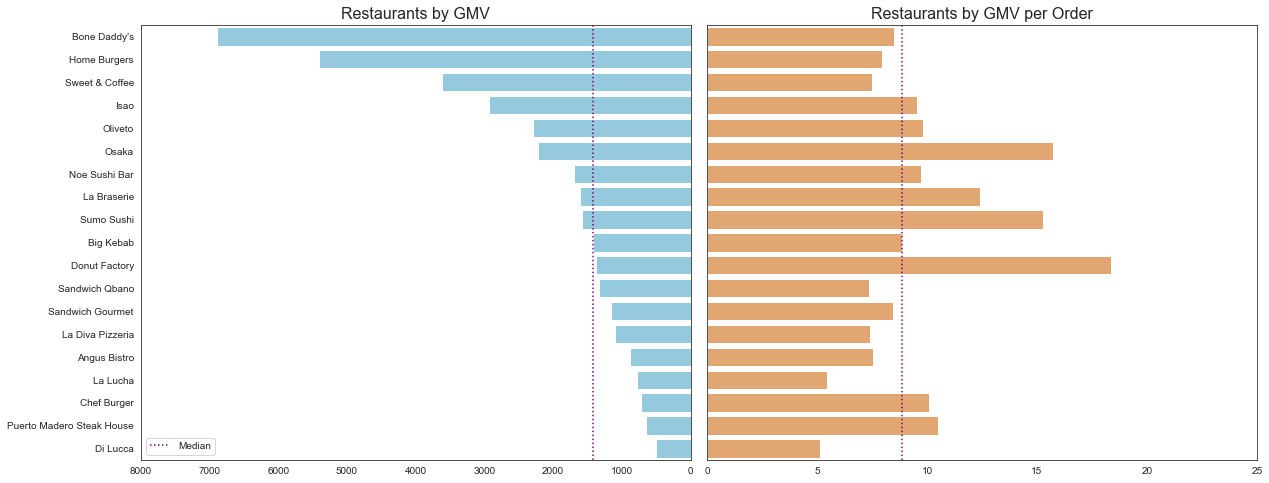

In [119]:


fig, ax = plt.subplots(1,2,figsize=(20, 8),sharey=True) 
plt.subplots_adjust(wspace=0.03)

grouped_mean =df.groupby('restaurant_name',as_index=True).mean()
grouped_mean = grouped_mean.sort_values(by='monthly_gmv',ascending=False)
sns.barplot(y=grouped_mean.index.values, x='monthly_gmv',data=grouped_mean,
            color='skyblue',ax=ax[0])
ax[0].set_title('Restaurants by GMV',fontsize=16)
ax[0].set_xlabel('')
# add vertical lines for 50th percentile
ax[0].axvline(x=1420,linestyle='dotted',color='purple',label='Median')
ax[0].legend(loc='lower left',facecolor='white',fontsize=10)
ax[0].set_xlim(0,8000)
ax[0].invert_xaxis()

# Number of active vendors
sns.barplot(y=grouped_mean.index.values, x='gmv_per_order',data=grouped_mean,
            color='sandybrown',ax=ax[1])
ax[1].set_title('Restaurants by GMV per Order',fontsize=16)
ax[1].set_xlabel('')
# add vertical lines for 50th percentile

ax[1].axvline(x=8.87,linestyle='dotted',color='purple',label='50th Percentile')
ax[1].set_xlim(0,25);

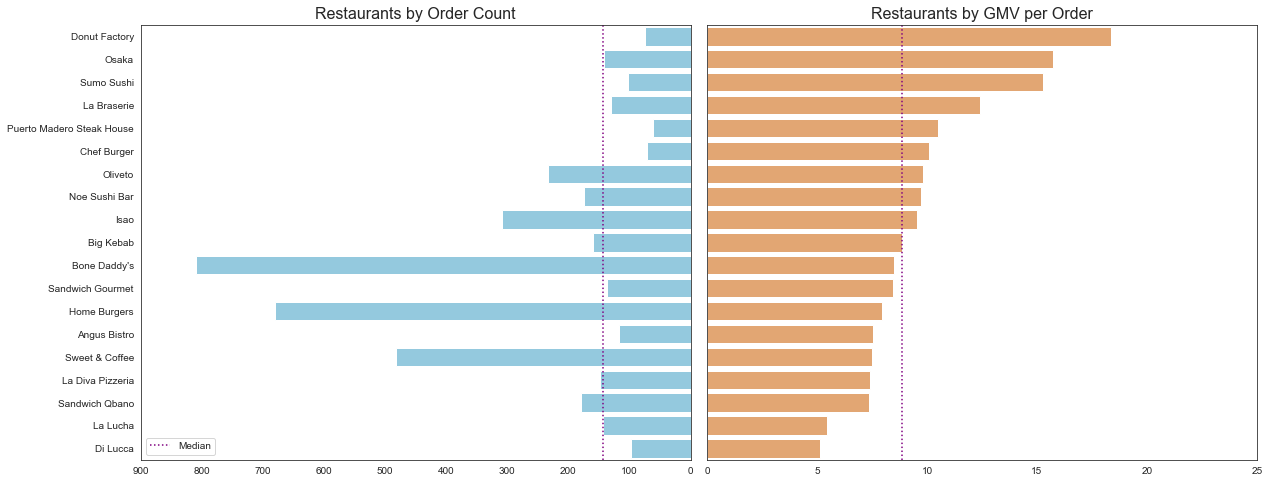

In [122]:
fig, ax = plt.subplots(1,2,figsize=(20, 8),sharey=True) 
plt.subplots_adjust(wspace=0.03)

grouped_mean =df.groupby('restaurant_name',as_index=True).mean()
grouped_mean = grouped_mean.sort_values(by='gmv_per_order',ascending=False)
sns.barplot(y=grouped_mean.index.values, x='monthly_orders',data=grouped_mean,
            color='skyblue',ax=ax[0])
ax[0].set_title('Restaurants by Order Count',fontsize=16)
ax[0].set_xlabel('')
# add vertical lines for 50th percentile
ax[0].axvline(x=144,linestyle='dotted',color='purple',label='Median')
ax[0].legend(loc='lower left',facecolor='white',fontsize=10)
ax[0].set_xlim(0,900)
ax[0].invert_xaxis()

# Number of active vendors
sns.barplot(y=grouped_mean.index.values, x='gmv_per_order',data=grouped_mean,
            color='sandybrown',ax=ax[1])
ax[1].set_title('Restaurants by GMV per Order',fontsize=16)
ax[1].set_xlabel('')
# add vertical lines for 50th percentile

ax[1].axvline(x=8.87,linestyle='dotted',color='purple',label='50th Percentile')
ax[1].set_xlim(0,25);

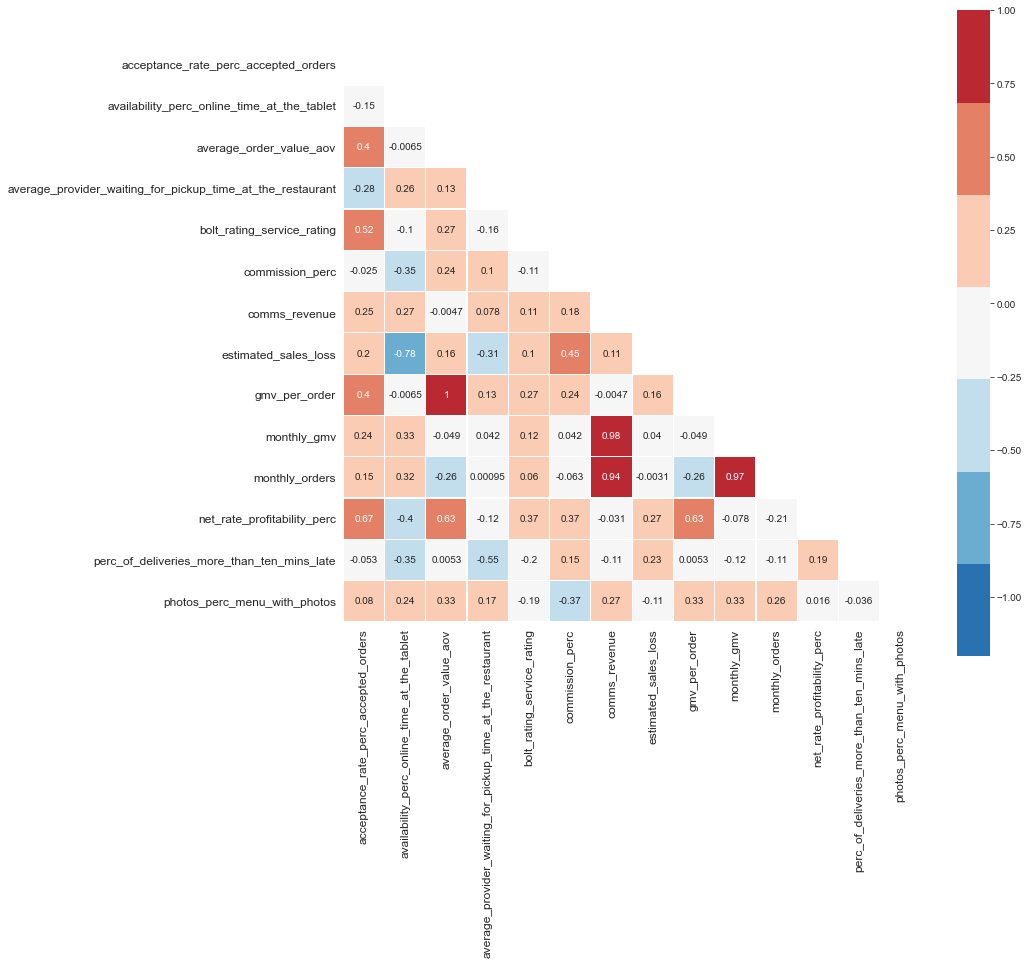

In [130]:
# order columns
rship = df[df.columns.sort_values()]

# plot heatmap
mask = np.zeros_like(rship.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(15, 20))
sns.heatmap(rship.corr(),
            mask = mask,
            square=True,
            vmin = -1.2,
            vmax = 1,
            linewidth=0.1,
            cbar_kws = {'shrink':0.5},
            cmap=sns.color_palette("RdBu_r", 7), annot=True)
ax.tick_params(labelsize=12)
plt.tight_layout()

                                             monthly_gmv
monthly_gmv                                     1.000000
comms_revenue                                   0.984024
monthly_orders                                  0.971975
photos_perc_menu_with_photos                    0.326620
availability_perc_online_time_at_the_tablet     0.325787
acceptance_rate_perc_accepted_orders            0.239707
perc_of_deliveries_more_than_ten_mins_late      0.118106
bolt_rating_service_rating                      0.116399
net_rate_profitability_perc                     0.077529
gmv_per_order                                   0.048771


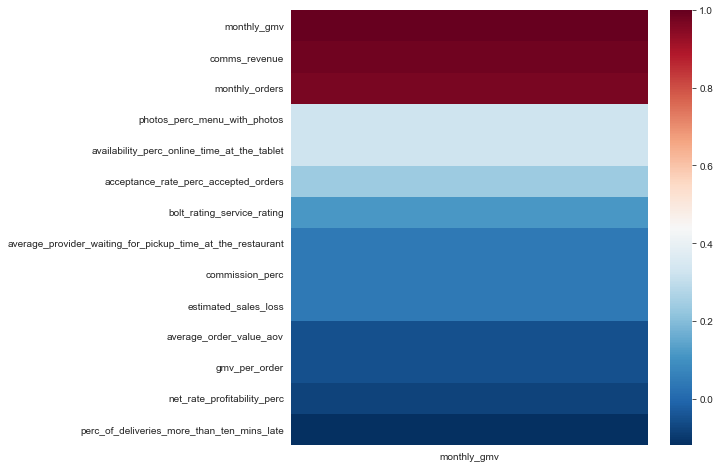

In [137]:
print(np.abs(df.corr())[['monthly_gmv']].sort_values('monthly_gmv', ascending=False).head(10))
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr()[['monthly_gmv']].sort_values('monthly_gmv'),
             cmap='RdBu_r', ax=ax);
ax.invert_yaxis()

**Order Status**

In [141]:
loss_over_gmv = df.groupby('restaurant_name')['loss_over_gmv'].sum().sort_values(ascending=False)

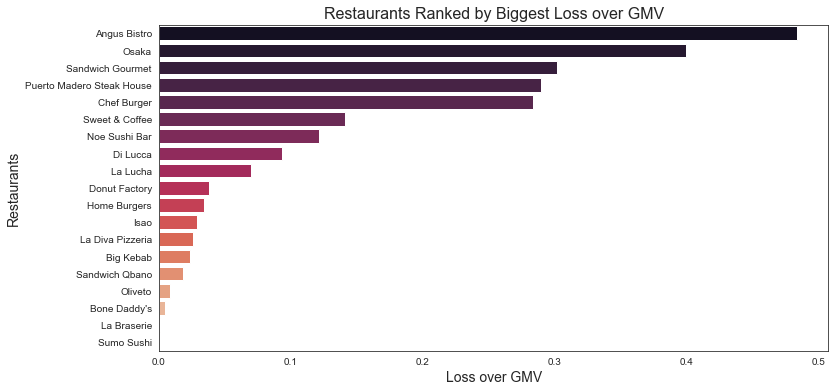

In [147]:
plt.figure(figsize=(12,6))
sns.barplot(x=loss_over_gmv, y=loss_over_gmv.index, palette='rocket')
plt.title("Restaurants Ranked by Biggest Loss over GMV", size=16)
plt.xlabel("Loss over GMV", size=14)
plt.ylabel('Restaurants', size=14);

In [184]:
not_critical_res = df[df.restaurant_name.isin(['Big Kebab', "Bone Daddy's",
       'Di Lucca', 'Donut Factory', 'Home Burgers', 'Isao', 'La Braserie',
       'La Diva Pizzeria', 'La Lucha', 'Noe Sushi Bar', 'Oliveto',
        'Sumo Sushi',
        'Sandwich Qbano'])].reset_index(drop=True)
not_critical_res[['availability_perc_online_time_at_the_tablet','photos_perc_menu_with_photos']].describe().T

,count,mean,std,min,25%,50%,75%,max
availability_perc_online_time_at_the_tablet,13.0,0.966346,0.033372,0.8913,0.9646,0.975,0.9911,0.9999
photos_perc_menu_with_photos,13.0,0.519231,0.461672,0.0000,0.0000,0.500,1.0000,1.0000


In [185]:
critical_res = df[df.restaurant_name.isin(['Angus Bistro','Sandwich Gourmet','Puerto Madero Steak House','Chef Burger',"Sweet & Coffee",'Osaka'])].reset_index(drop=True)
critical_res[['availability_perc_online_time_at_the_tablet','photos_perc_menu_with_photos']].describe().T

,count,mean,std,min,25%,50%,75%,max
availability_perc_online_time_at_the_tablet,6.0,0.763117,0.068807,0.6723,0.727625,0.77045,0.77465,0.8761
photos_perc_menu_with_photos,6.0,0.383333,0.376386,0.0000,0.075000,0.40000,0.50000,1.0000


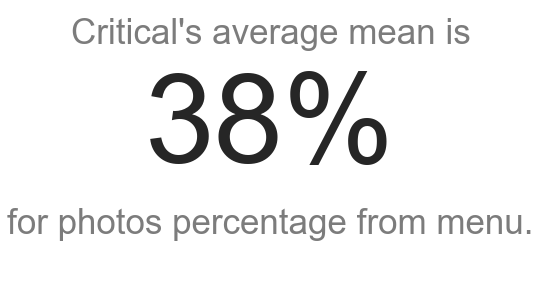

In [190]:
mean = 0.383333 * 100
mean

# Set size of figure: eight by five.
plt.figure(figsize=(8, 5))

# Create text:
plt.text(x = 0.5,                              # at horizontal = 0.5
         y = 0.9,                              # at vertical = 0.9
         s = 'Critical\'s average mean is', # content of text (string)
         ha = 'center',                        # center-aligned horizontally
         va = 'center',                        # center-aligned vertically
         size = 35,                            # font size = 35
         alpha = 0.6)                          # alpha = 0.6 --> 60% opaque; 40% clear


# Create text:
# at (horizontal = 0.5, vertical = 0.55)
# stating the percent change (s means string)
# center-aligned
# font size 125
# alpha = 1 --> totally opaque

plt.text(x = 0.5,
         y = 0.55,
         s = str(round(mean)) + '%',
         ha = 'center',
         va = 'center',
         size = 125,
         alpha = 1)


plt.text(x = 0.5,
         y = 0.2,
         s = 'for photos percentage from menu.',
         ha = 'center',
         va = 'center',
         size = 35,
         alpha = 0.6)

# No axes.
plt.axis('off');

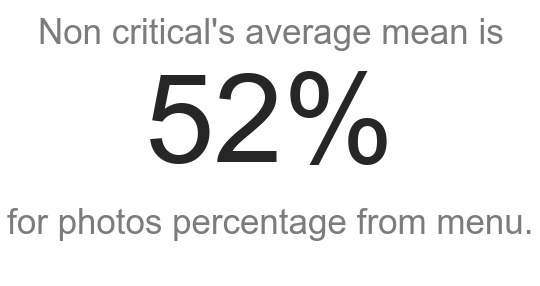

In [189]:
mean = 0.519231 * 100
mean

# Set size of figure: eight by five.
plt.figure(figsize=(8, 5))

# Create text:
plt.text(x = 0.5,                              # at horizontal = 0.5
         y = 0.9,                              # at vertical = 0.9
         s = 'Non critical\'s average mean is', # content of text (string)
         ha = 'center',                        # center-aligned horizontally
         va = 'center',                        # center-aligned vertically
         size = 35,                            # font size = 35
         alpha = 0.6)                          # alpha = 0.6 --> 60% opaque; 40% clear


# Create text:
# at (horizontal = 0.5, vertical = 0.55)
# stating the percent change (s means string)
# center-aligned
# font size 125
# alpha = 1 --> totally opaque

plt.text(x = 0.5,
         y = 0.55,
         s = str(round(mean)) + '%',
         ha = 'center',
         va = 'center',
         size = 125,
         alpha = 1)


plt.text(x = 0.5,
         y = 0.2,
         s = 'for photos percentage from menu.',
         ha = 'center',
         va = 'center',
         size = 35,
         alpha = 0.6)

# No axes.
plt.axis('off');